<a href="https://colab.research.google.com/github/brilli44/PCVK_ganjil_24/blob/main/Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Brilliantna Salsabila
### Kelas : TI 3B/04
### Matkul : PCVK Week 10

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Global Threshold

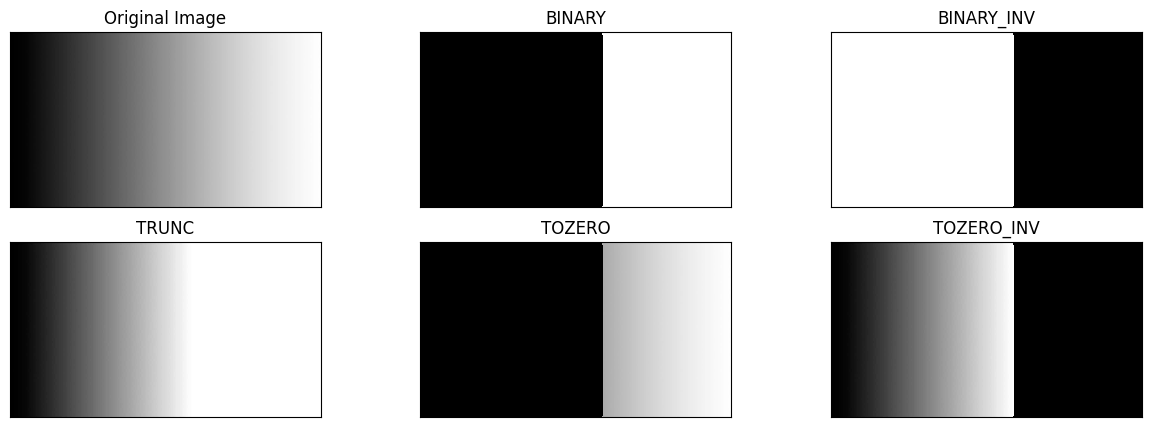

In [6]:
filename = '/content/drive/MyDrive/PCVK/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
threshold = 170
binary = np.where(img > threshold, 255, 0)
binary_inv = np.where(img > threshold, 0, 255)
truncate = np.where(img > threshold, threshold, img)

tozero = np.where(img > threshold, img, 0)

tozero_inv = np.where(img > threshold, 0, img)

# Define the titles for the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, truncate, tozero, tozero_inv]

# Display the images
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


## Otsu Thresholding

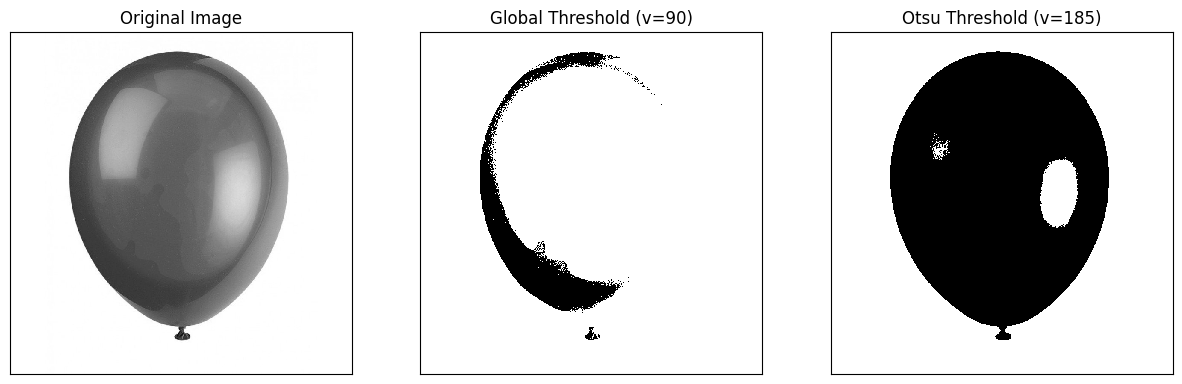

In [9]:
filename = '/content/drive/MyDrive/PCVK/balloon.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Step 1: Global thresholding with a fixed value of 90
global_binary = np.where(img > 90, 255, 0)

# Step 2: Compute the histogram of the image
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Step 3: Calculate the probability of each intensity level
pixel_count = img.size
probability = hist / pixel_count

# Step 4: Initialize variables for Otsu's method
current_max_variance = 0
threshold_value = 0
total_mean = np.dot(np.arange(256), probability)

# Step 5: Iterate through all possible thresholds (0-255) to find the best one
weight_background = 0
mean_background = 0

for t in range(256):
    weight_background += probability[t]
    if weight_background == 0:
        continue

    weight_foreground = 1 - weight_background
    if weight_foreground == 0:
        break

    mean_background += t * probability[t]
    mean_foreground = total_mean - mean_background

    # Calculate mean values
    mean_bg = mean_background / weight_background
    mean_fg = mean_foreground / weight_foreground

    # Calculate between-class variance
    between_class_variance = weight_background * weight_foreground * (mean_bg - mean_fg) ** 2

    # Find the maximum variance and update the threshold
    if between_class_variance > current_max_variance:
        current_max_variance = between_class_variance
        threshold_value = t

# Step 6: Apply the threshold to create a binary image using Otsu's method
otsu_binary = np.where(img > threshold_value, 255, 0)

# Show the results
titles = ['Original Image', 'Global Threshold (v=90)', f'Otsu Threshold (v={threshold_value})']
images = [img, global_binary, otsu_binary]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


## Histogram foreground

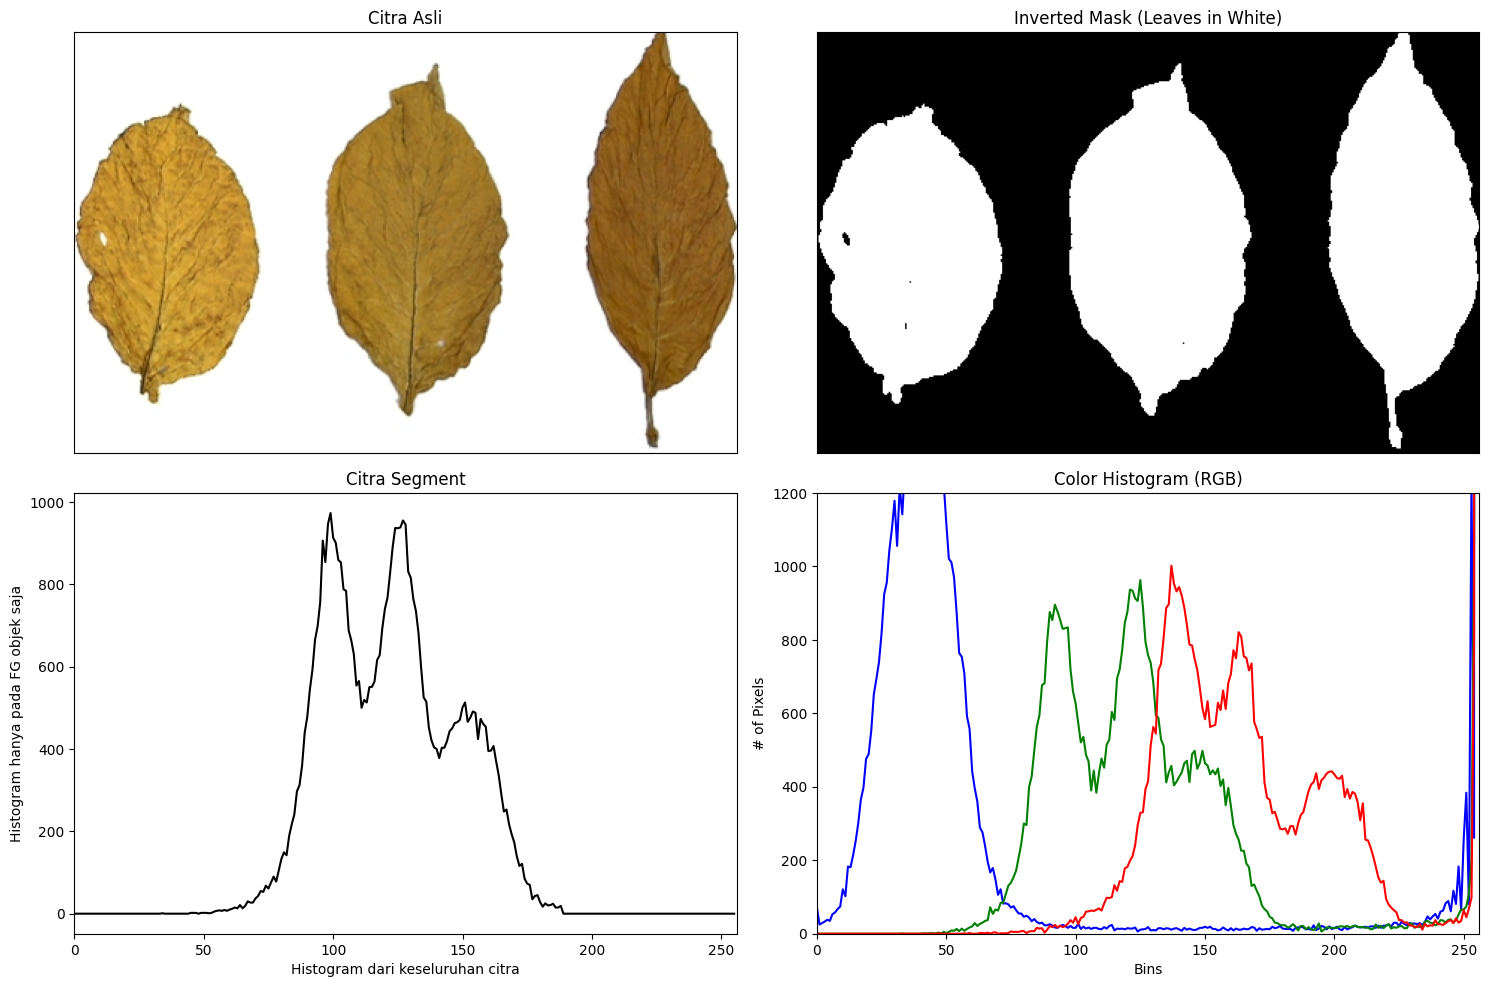

-1

In [16]:

filename = '/content/drive/MyDrive/PCVK/tobacco.jpg'
img_color = cv.imread(filename)
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Load the image in grayscale
img_gray = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Load as grayscale image

# Step 1: Use Otsu's method to create a binary mask where leaves (foreground) are white
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the mask so that leaves are white and the background is black
mask_inv = cv.bitwise_not(mask)

# Step 2: Calculate the histogram for the segmented (foreground) image using the inverted mask
hist_foreground = cv.calcHist([img_gray], [0], mask_inv, [256], [0, 256])

# Step 3: Plot the original RGB image, mask, and histogram
plt.figure(figsize=(15, 10))

# Plot the original RGB image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)  # Display the RGB image
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Plot the inverted mask (foreground is white)
plt.subplot(2, 2, 2)
plt.imshow(mask_inv, cmap='gray')  # Display the mask
plt.title('Inverted Mask (Leaves in White)')
plt.xticks([]), plt.yticks([])

# Plot the histogram of the foreground (leaves) below the images
plt.subplot(2, 2, 3)
plt.plot(hist_foreground, color='black')
plt.title('Citra Segment')
plt.xlabel('Histogram dari keseluruhan citra')
plt.ylabel('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

# Second part: Flattened color histogram of the original color image
chans = cv.split(img_color)
colors = ('b', 'g', 'r')

plt.subplot(2, 2, 4)
plt.title('Color Histogram (RGB)')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

# Plot histograms for each color channel
for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])  # Adjusting y-limit based on your requirement

plt.tight_layout()
plt.show()
cv.waitKey(0)


## Segmentasi Warna Kuning

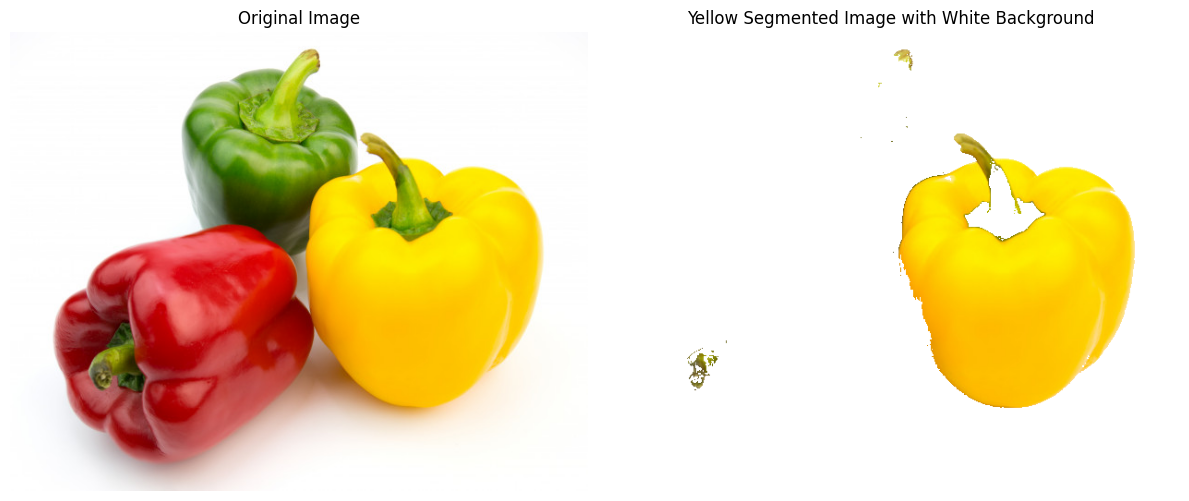

In [23]:

# Load the image
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(filename)

# Convert the image from BGR to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the HSV range for yellow color
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Create a mask for yellow regions
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Create a new image with a white background
yellow_segment = np.ones_like(img) * 255  # Initialize a white background

# Use the mask to extract yellow regions, keeping the white background
yellow_segment[mask > 0] = img[mask > 0]

# Display the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Yellow segment image with white background
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(yellow_segment, cv.COLOR_BGR2RGB))
plt.title('Yellow Segmented Image ')
plt.axis('off')

plt.tight_layout()
plt.show()


## Segmentasi Warna Merah

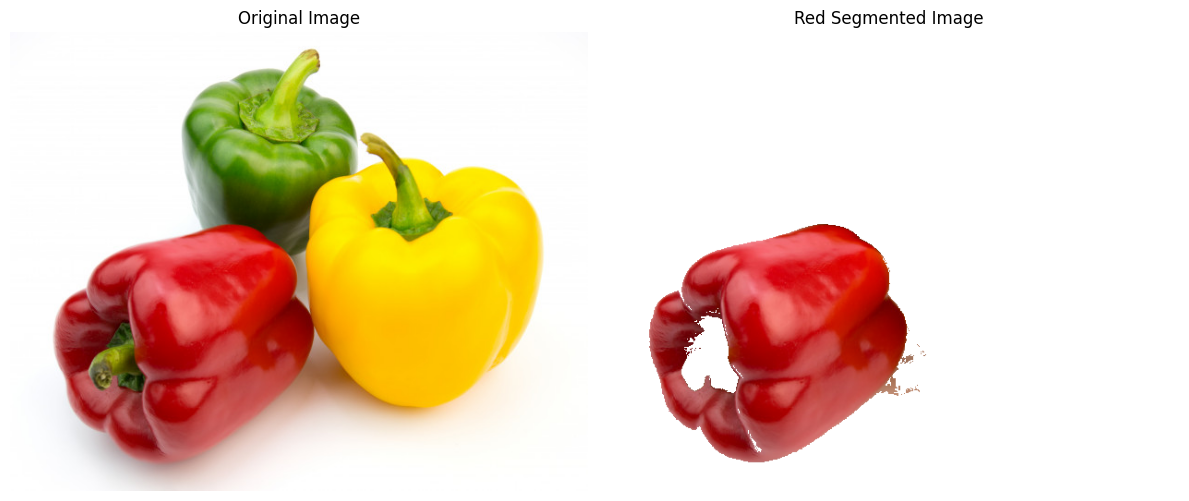

In [27]:

# Load the image
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(filename)

# Convert the image from BGR to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the HSV range for yellow color
lower_red1 = np.array([0, 100, 100])    # Lower bound for red (1st range)
upper_red1 = np.array([10, 255, 255])   # Upper bound for red (1st range)
lower_red2 = np.array([160, 100, 100])  # Lower bound for red (2nd range)
upper_red2 = np.array([180, 255, 255])  # Upper bound for red (2nd range)

mask1 = cv.inRange(hsv, lower_red1, upper_red1)
mask2 = cv.inRange(hsv, lower_red2, upper_red2)
mask = mask1 + mask2  # Combine the masks

# Create a new image with a white background
red_segment = np.ones_like(img) * 255  # Initialize a white background

# Use the mask to extract yellow regions, keeping the white background
red_segment[mask > 0] = img[mask > 0]

# Display the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(red_segment, cv.COLOR_BGR2RGB))
plt.title('Red Segmented Image ')
plt.axis('off')

plt.tight_layout()
plt.show()


## Segmentasi Warna Hijau

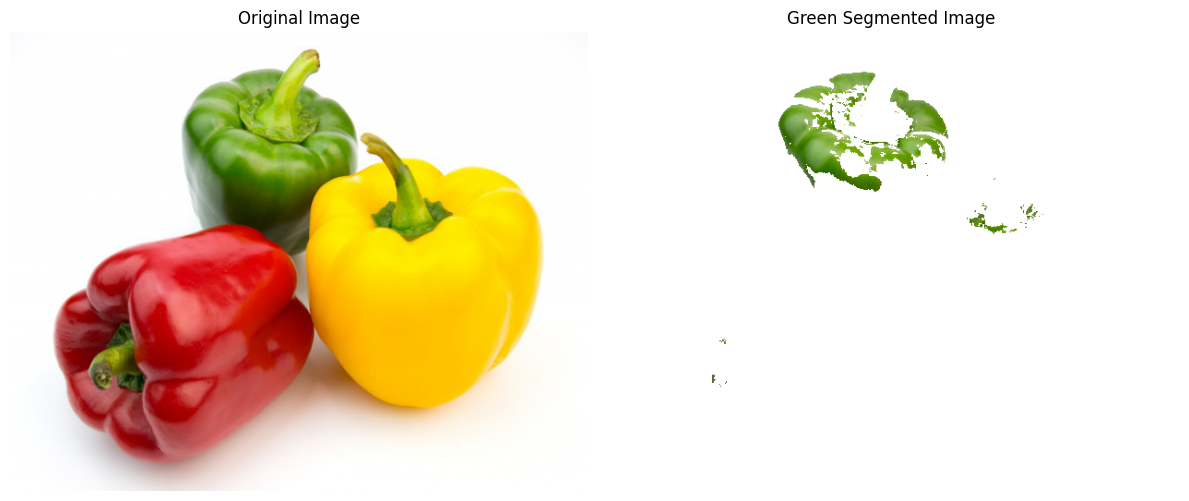

In [29]:

# Load the image
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(filename)

# Convert the image from BGR to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the HSV range for green color
lower_green = np.array([40, 100, 100])  # Lower bound for green
upper_green = np.array([80, 255, 255])   # Upper bound for green

# Create a mask for green regions
mask = cv.inRange(hsv, lower_green, upper_green)

# Create a new image with a white background
green_segment = np.ones_like(img) * 255  # Initialize a white background

# Use the mask to extract green regions, keeping the white background
green_segment[mask > 0] = img[mask > 0]

# Display the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Green segment image with white background
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(green_segment, cv.COLOR_BGR2RGB))
plt.title('Green Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.
  - Kendala Umum dan Penyebabnya
    Pemilihan Rentang Warna yang Tidak Tepat:
      a. Kendala: Warna tidak tersegmentasi dengan baik.
      b. Penyebab: Rentang warna yang terlalu sempit atau lebar tidak mencakup semua variasi warna.
  - Variasi Pencahayaan:
      a. Kendala: Warna tampak berbeda dari aslinya.
      b.Penyebab: Pencahayaan yang tidak merata saat pengambilan gambar.
  - Noise pada Gambar:
      a. Kendala: Deteksi warna menjadi sulit.
      b. Penyebab: Noise bisa berasal dari kamera atau pengaturan yang tidak tepat.
  - Perbedaan Pengaturan Warna pada Layar:
      a. Kendala: Hasil yang ditampilkan tidak akurat.
      b. Penyebab: Kalibrasi monitor yang buruk atau perbedaan ruang warna.
  - Model Warna yang Berbeda:
      a. Kendala: Kebingungan saat mengubah antara model warna.
      b. Penyebab: Kesalahan dalam konversi antara BGR dan HSV.
  - Solusi
      a. Eksperimen dengan Rentang Warna: Coba rentang warna yang berbeda
      b. Perbaiki Pencahayaan: Ambil gambar dalam pencahayaan yang konsisten
      c. Gunakan Filter: Terapkan filter untuk mengurangi noise.
      d. Kalibrasi Monitor: Pastikan monitor menampilkan warna dengan akurat
      e. Visualisasikan Rentang Warna: Tampilkan rentang warna untuk memastikan semua variasi terdeteksi.

## Crossword

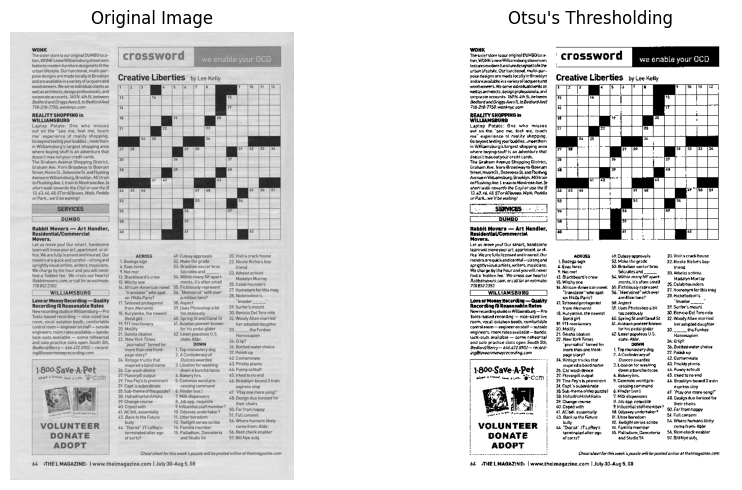

In [32]:

# Load the image
filename = '/content/drive/MyDrive/PCVK/crossword.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Load image in grayscale

# Apply Otsu's thresholding
ret, binary = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the original and the thresholded image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Binary thresholded image
plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()
